In [1]:
import pandas as pd
import string

In [2]:
df = pd.read_csv("/kaggle/input/email-classification-ham-spam/email_classification.csv")
df.head(3)

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham


# Let"s see How many spam and ham email text we have

In [3]:
df["label"].value_counts()

label
ham     100
spam     79
Name: count, dtype: int64

1-Removing punctuation and special characters.

2-Converting all text to lowercase.

3-Removing stopwords (common words like 'and', 'the', 'is' that do not carry much information for classification).

4-Stemming or lemmatization (reducing words to their root form) to normalize the text.


# Removing punctuation and special characters.

In [4]:
def remove_punctuation(text):
    punctuations = string.punctuation
    no_punct = ''.join([char for char in text if char not in punctuations])
    return no_punct

df['cleaned_email'] = df['email'].apply(remove_punctuation)
df['cleaned_email']

0      Upgrade to our premium plan for exclusive acce...
1      Happy holidays from our team Wishing you joy a...
2      Were hiring Check out our career opportunities...
3      Your Amazon account has been locked Click here...
4      Your opinion matters Take our survey and help ...
                             ...                        
174    Were pleased to inform you that your refund ha...
175    Get rich quick Invest in our revolutionary new...
176    Your free trial period is ending soon Upgrade ...
177    Your order is on its way Track your shipment f...
178    Limitedtime offer Get 50 off on all purchases ...
Name: cleaned_email, Length: 179, dtype: object

# 2-Converting all text to lowercase.

In [5]:
def lower_case(text):
    return text.lower()

df['cleaned_email'] = df['cleaned_email'].apply(lower_case)
df['cleaned_email']

0      upgrade to our premium plan for exclusive acce...
1      happy holidays from our team wishing you joy a...
2      were hiring check out our career opportunities...
3      your amazon account has been locked click here...
4      your opinion matters take our survey and help ...
                             ...                        
174    were pleased to inform you that your refund ha...
175    get rich quick invest in our revolutionary new...
176    your free trial period is ending soon upgrade ...
177    your order is on its way track your shipment f...
178    limitedtime offer get 50 off on all purchases ...
Name: cleaned_email, Length: 179, dtype: object

# 3-Removing stopwords (common words like 'and', 'the', 'is' that do not carry much information for classification).

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def clean_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()  # Split text into words
    cleaned_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(cleaned_words)  # Join cleaned words back into a single string



df['cleaned_email'] = df['cleaned_email'].apply(clean_stopwords)
df['cleaned_email']

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      upgrade premium plan exclusive access premium ...
1      happy holidays team wishing joy prosperity season
2      hiring check career opportunities join dynamic...
3      amazon account locked click verify account inf...
4      opinion matters take survey help us enhance ex...
                             ...                        
174         pleased inform refund processed successfully
175    get rich quick invest revolutionary new scheme...
176    free trial period ending soon upgrade continue...
177            order way track shipment realtime updates
178    limitedtime offer get 50 purchases today dont ...
Name: cleaned_email, Length: 179, dtype: object

In [7]:
df["label"].replace({"ham": 0, "spam": 1}, inplace=True)

/tmp/ipykernel_18/2273883485.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label"].replace({"ham": 0, "spam": 1}, inplace=True)
/tmp/ipykernel_18/2273883485.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"].replace({"ham": 0, "spam": 1}, inplace=True)


In [8]:
df

,email,label,cleaned_email
0,Upgrade to our premium plan for exclusive acce...,0,upgrade premium plan exclusive access premium ...
1,Happy holidays from our team! Wishing you joy ...,0,happy holidays team wishing joy prosperity season
2,We're hiring! Check out our career opportuniti...,0,hiring check career opportunities join dynamic...
3,Your Amazon account has been locked. Click her...,1,amazon account locked click verify account inf...
4,Your opinion matters! Take our survey and help...,0,opinion matters take survey help us enhance ex...
...,...,...,...
174,We're pleased to inform you that your refund h...,0,pleased inform refund processed successfully
175,Get rich quick! Invest in our revolutionary ne...,1,get rich quick invest revolutionary new scheme...
176,Your free trial period is ending soon. Upgrade...,0,free trial period ending soon upgrade continue...
177,Your order is on its way! Track your shipment ...,0,order way track shipment realtime updates


# Creating Model

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['cleaned_email'])  # 'cleaned_email' sütunundaki metinleri vektörlere dönüştürür
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")


Test Accuracy: 1.0


In [10]:
new_text = "You have been selected as the lucky winner of our exclusive cruise vacation package! This is a once-in-a-lifetime opportunity to enjoy a luxurious cruise to exotic destinations around the world.To claim your prize, simply click on the link below and provide your contact details. Don't miss out on this amazing offer!"

X_new = vectorizer.transform([new_text])
predicted = clf.predict(X_new)
print(f"Predicted class: {predicted}")


Predicted class: [1]


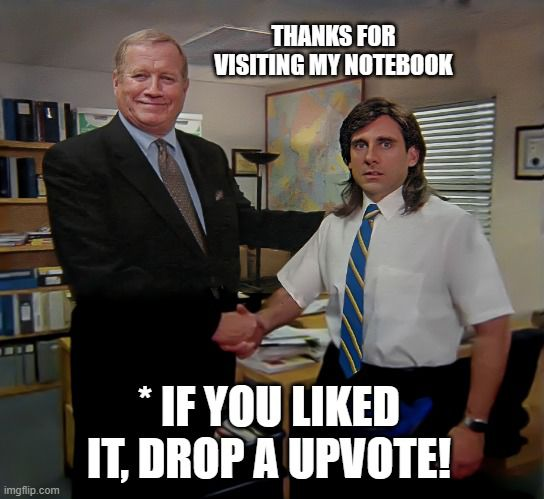
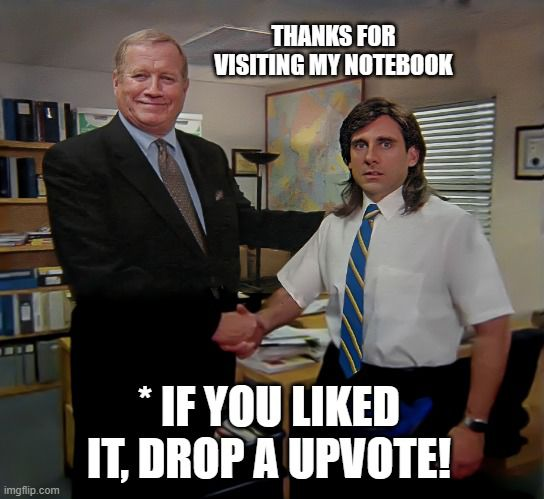